In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
wine = load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [6]:
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0


In [10]:
X = wine.data
Y = wine.target

In [11]:
# Standardize the data due to sensitivity of PCA
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X[:2]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152]])

In [12]:
# Apply PCA for dimension reduction
pca = PCA(n_components=2)
pca_X = pca.fit_transform(scaled_X)

In [14]:
# variance of each components
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

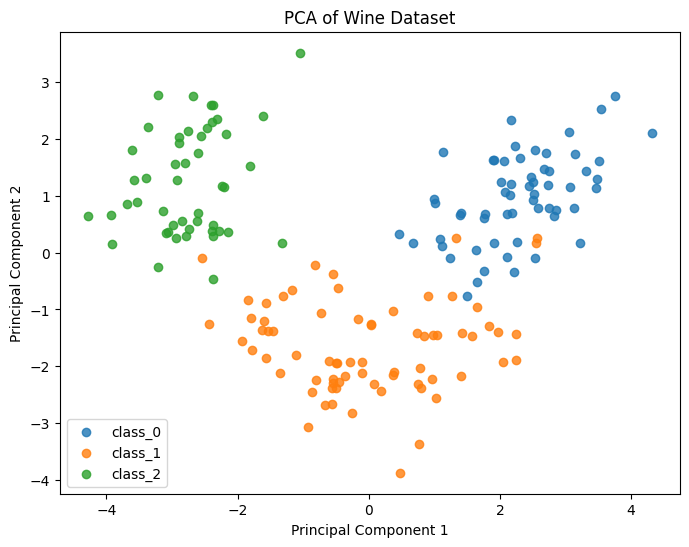

In [17]:
plt.figure(figsize=(8, 6))
for target in np.unique(Y):
    plt.scatter(pca_X[Y == target, 0], pca_X[Y == target, 1], label=wine.target_names[target], alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Wine Dataset")
plt.legend()
plt.show()